                             Private  Apps  Accept  Enroll  Top10perc  \
Unnamed: 0                                                              
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Unnamed: 0                                                                    
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific

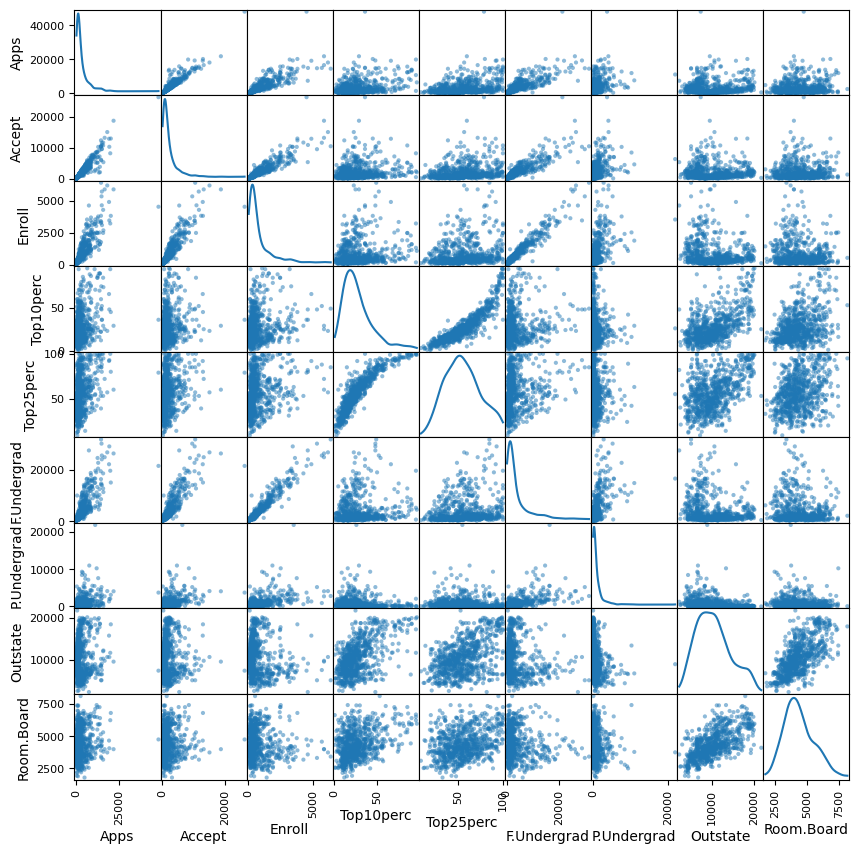

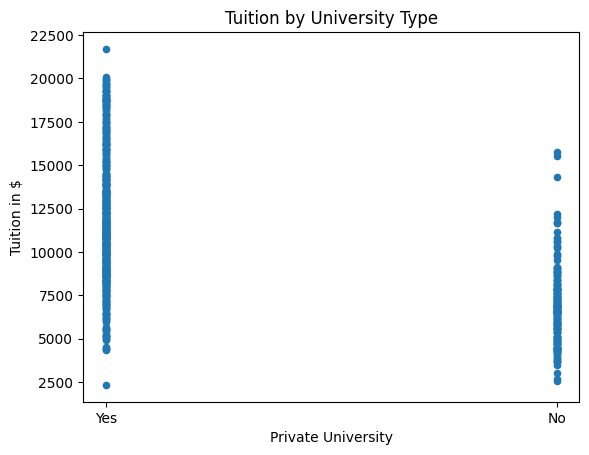

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object


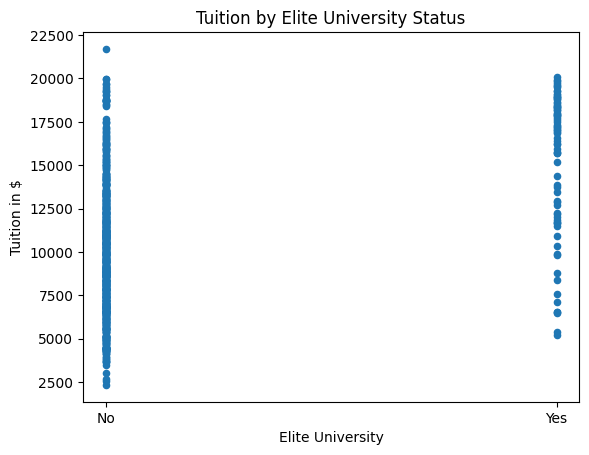

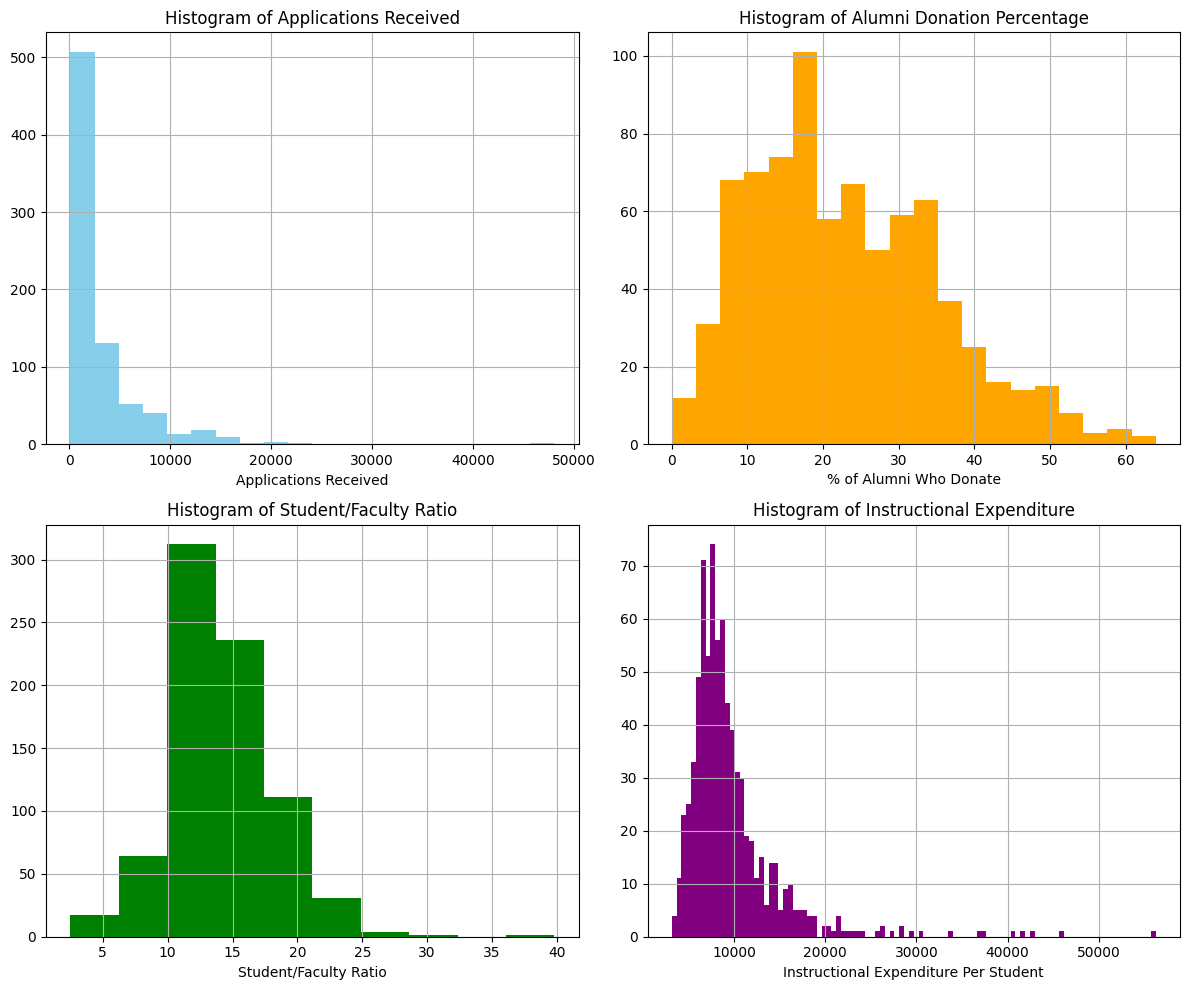

The university with the most students in the top 10% of class is: Massachusetts Institute of Technology
The university with the smallest acceptance rate is: Princeton University
The university with the most liberal acceptance rate is: Emporia State University


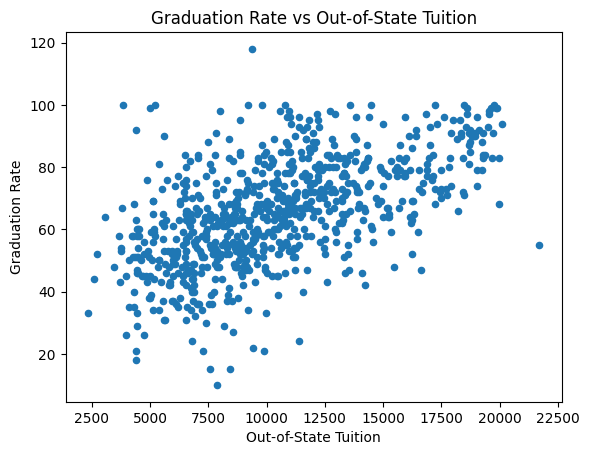

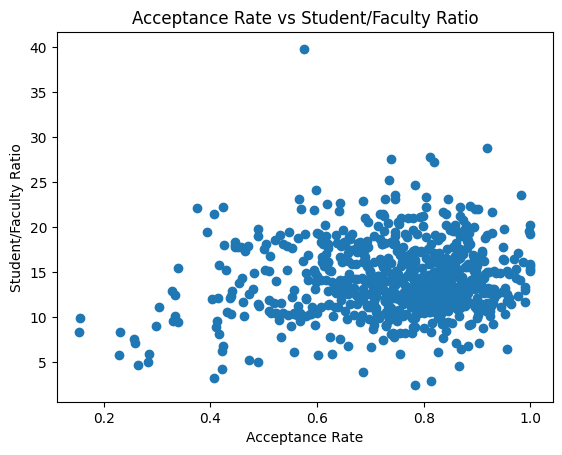

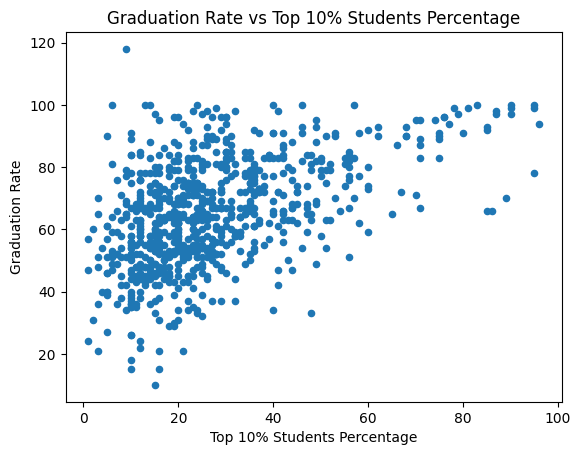

In [12]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
college = pd.read_csv("College.csv")

# Set the first column as the index and drop it from the data
college.index = college.iloc[:, 0]
college = college.iloc[:, 1:]

# Display the first five rows of the dataset
print(college.head())

# Display descriptive statistics of the dataset
print(college.describe())

# Convert Private variable to a categorical variable
college['Private'] = pd.Categorical(college['Private'])

# Plot the scatter matrix of the first 10 columns
pd.plotting.scatter_matrix(college.iloc[:, :10], figsize=(10, 10), diagonal='kde')
plt.show()

# Plot a scatter plot of Outstate versus Private
college.plot(x='Private', y='Outstate', kind='scatter', xlabel='Private University', ylabel='Tuition in $')
plt.title('Tuition by University Type')
plt.show()

# Determine elite universities based on Top10perc variable
Elite = ['No'] * len(college)
Elite = ['Yes' if val > 50 else el for el, val in zip(Elite, college['Top10perc'])]
Elite = pd.Categorical(Elite)
college['Elite'] = Elite

# Display descriptive statistics for elite universities
print(college['Elite'].describe())

# Plot a scatter plot of Outstate versus Elite
college.plot(x='Elite', y='Outstate', kind='scatter', xlabel='Elite University', ylabel='Tuition in $')
plt.title('Tuition by Elite University Status')
plt.show()

# Create histograms for quantitative variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

college['Apps'].hist(ax=axes[0, 0], bins=20, color='skyblue')
axes[0, 0].set_xlabel('Applications Received')
axes[0, 0].set_title('Histogram of Applications Received')

college['perc.alumni'].hist(ax=axes[0, 1], color='orange', bins=20)
axes[0, 1].set_xlabel('% of Alumni Who Donate')
axes[0, 1].set_title('Histogram of Alumni Donation Percentage')

college['S.F.Ratio'].hist(ax=axes[1, 0], color='green', bins=10)
axes[1, 0].set_xlabel('Student/Faculty Ratio')
axes[1, 0].set_title('Histogram of Student/Faculty Ratio')

college['Expend'].hist(ax=axes[1, 1], bins=100, color='purple')
axes[1, 1].set_xlabel('Instructional Expenditure Per Student')
axes[1, 1].set_title('Histogram of Instructional Expenditure')

plt.tight_layout()
plt.show()

# Interesting observations:

# Find the university with the highest proportion of top 10% students
top_10_university_index = college['Top10perc'].idxmax()
top_10_university = college.loc[top_10_university_index]
print(f"The university with the most students in the top 10% of class is: {top_10_university.name}")

# Calculate acceptance rates
acceptance_rate = college['Accept'] / college['Apps']

# Find the university with the lowest acceptance rate
lowest_acceptance_rate_index = acceptance_rate.idxmin()
lowest_acceptance_university = college.loc[lowest_acceptance_rate_index]
print(f"The university with the smallest acceptance rate is: {lowest_acceptance_university.name}")

# Find the university with the highest acceptance rate
highest_acceptance_rate_index = acceptance_rate.idxmax()
highest_acceptance_university = college.loc[highest_acceptance_rate_index]
print(f"The university with the most liberal acceptance rate is: {highest_acceptance_university.name}")

# Plot a scatter plot of Outstate versus Grad.Rate
college.plot(x='Outstate', y='Grad.Rate', kind='scatter')
plt.title('Graduation Rate vs Out-of-State Tuition')
plt.xlabel('Out-of-State Tuition')
plt.ylabel('Graduation Rate')
plt.show()

# Plot a scatter plot of acceptance rate versus Student/Faculty Ratio
plt.scatter(acceptance_rate, college['S.F.Ratio'])
plt.title('Acceptance Rate vs Student/Faculty Ratio')
plt.xlabel('Acceptance Rate')
plt.ylabel('Student/Faculty Ratio')
plt.show()

# Plot a scatter plot of Top10perc versus Grad.Rate
college.plot(x='Top10perc', y='Grad.Rate', kind='scatter')
plt.title('Graduation Rate vs Top 10% Students Percentage')
plt.xlabel('Top 10% Students Percentage')
plt.ylabel('Graduation Rate')
plt.show()
